## importation des données

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [40]:
test = pd.read_csv('test20.csv')
train = pd.read_csv('train30.csv')

In [41]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [42]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## - Exploration des données
-on drop les valeurs null
-on supprime la colonne unnamed 0

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [44]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [45]:
train.drop('Unnamed: 0',axis = 1, inplace = True)
test.drop('Unnamed: 0',axis = 1, inplace = True)

In [46]:
li = ['Gender','Customer Type','Flight Distance','Class','satisfaction']
for i in li :
    print(i," : ", train[i].unique())

Gender  :  ['Male' 'Female']
Customer Type  :  ['Loyal Customer' 'disloyal Customer']
Flight Distance  :  [ 460  235 1142 ... 1003 1441  884]
Class  :  ['Eco Plus' 'Business' 'Eco']
satisfaction  :  ['neutral or dissatisfied' 'satisfied']


In [47]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## - encodage des train et test set

In [48]:
from sklearn.preprocessing import LabelEncoder
li = ['Gender','Customer Type','Type of Travel','Class']
le_df = LabelEncoder()
train_enc = train.copy()
for l in li :
    train_enc[l] = le_df.fit_transform(train[l])

In [50]:
from sklearn.preprocessing import LabelEncoder
li = ['Gender','Customer Type','Type of Travel','Class']
le_df = LabelEncoder()
test_enc = test.copy()
for l in li :
    test_enc[l] = le_df.fit_transform(test[l])

In [51]:
train_enc

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [52]:
test_enc

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## - Separation des features du target

In [53]:
Xt = test_enc.drop(['id','satisfaction'],axis = 1)
yt = test_enc['satisfaction']

## -creation du model KNN en effectuant le cross validation

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = train_enc.drop(['id','satisfaction'],axis = 1)
y = train_enc['satisfaction']

# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Effectuer une validation croisée (par exemple, avec une validation croisée à 5 plis)
scores = cross_val_score(knn, X, y, cv=5)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)

# Afficher la précision moyenne
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [0.7532628  0.75094602 0.75109086 0.75723057 0.74672742]
Précision moyenne: 0.7518515333141351


## - Le cross validation pour differents K values

In [ ]:
# Définition des valeurs de k à tester
k_values = list(range(1, 31))

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Validation croisée pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Recherche du meilleur paramètre k
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Meilleur paramètre k trouvé par validation croisée :", best_k)

Meilleur paramètre k trouvé par validation croisée : 9

In [55]:
# Entraînement du modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X, y)

# Évaluation sur l'ensemble de test
test_accuracy = best_knn.score(Xt, yt)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.8163982543544588


## curve validation

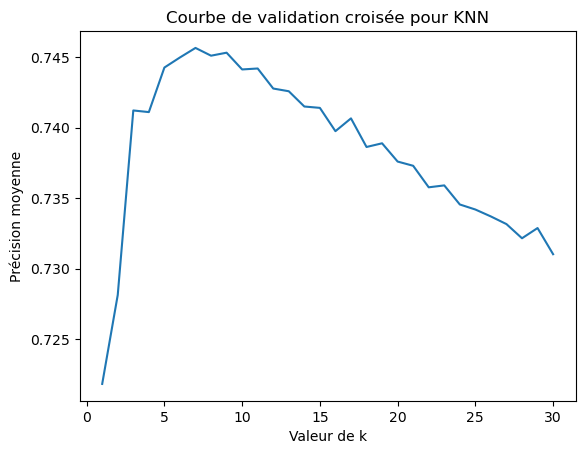

In [21]:
# Tracé de la courbe de validation croisée
plt.plot(k_values, cv_scores)
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.title('Courbe de validation croisée pour KNN')
plt.show()

# - amelioration de l'accuracy 
## en stardardisant les données et suppression des outlyers

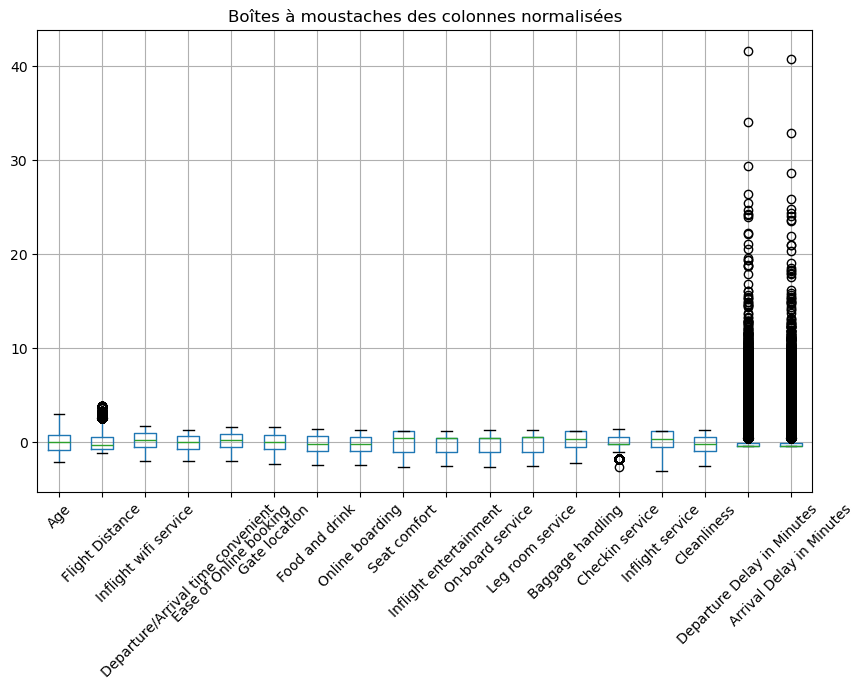

In [56]:
from sklearn.preprocessing import StandardScaler
# Sélection des colonnes à normaliser
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                    'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service',
                    'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Création du StandardScaler
scaler = StandardScaler()

# Normalisation des données
train_enc_scaled = train_enc.copy()  # Assurez-vous d'avoir une copie pour ne pas modifier les données originales
train_enc_scaled[columns_to_scale] = scaler.fit_transform(train_enc[columns_to_scale])

# Affichage des boîtes à moustaches
plt.figure(figsize=(10, 6))
train_enc_scaled[columns_to_scale].boxplot()
plt.title('Boîtes à moustaches des colonnes normalisées')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

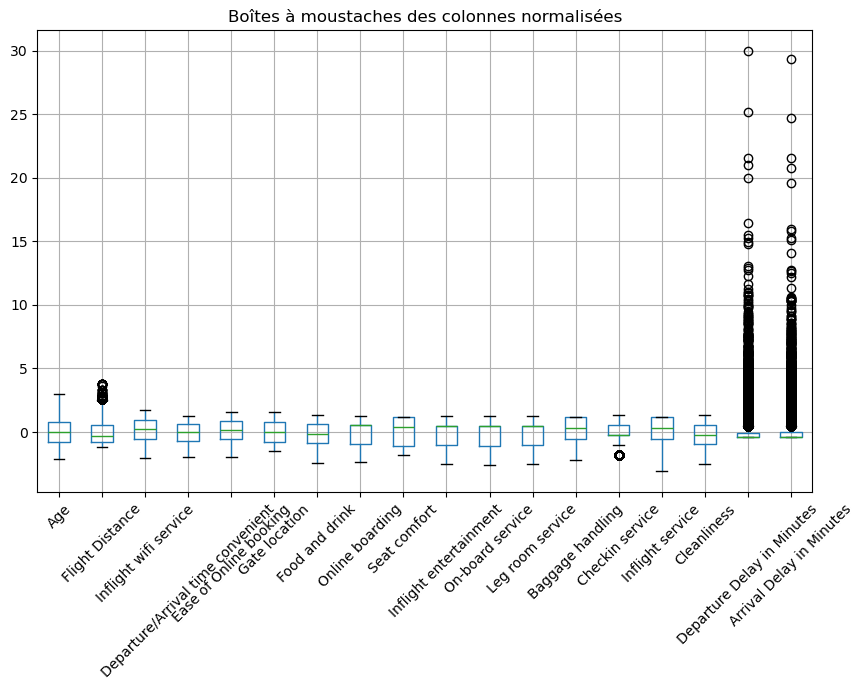

In [57]:
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                    'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service',
                    'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Création du StandardScaler
scaler = StandardScaler()

# Normalisation des données
test_enc_scaled = test_enc.copy()  # Assurez-vous d'avoir une copie pour ne pas modifier les données originales
test_enc_scaled[columns_to_scale] = scaler.fit_transform(test_enc[columns_to_scale])

# Affichage des boîtes à moustaches
plt.figure(figsize=(10, 6))
test_enc_scaled[columns_to_scale].boxplot()
plt.title('Boîtes à moustaches des colonnes normalisées')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

## - Filtrer le data set en supprimant les outlyers

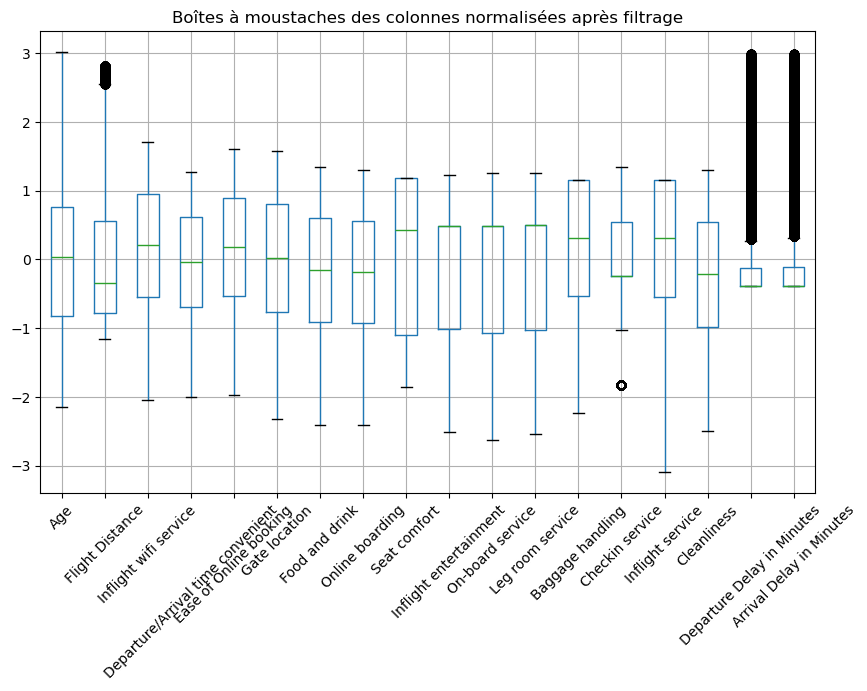

In [58]:
# Supprimer les lignes avec des valeurs supérieures à 5 dans les colonnes 'Departure Delay in Minutes' et 'Arrival Delay in Minutes'
train_enc_filtered = train_enc_scaled.loc[(train_enc_scaled['Departure Delay in Minutes'] <= 3) & (train_enc_scaled['Arrival Delay in Minutes'] <= 3) & (train_enc_scaled['Flight Distance'] <= 3)]

# Affichage des boîtes à moustaches après filtrage
plt.figure(figsize=(10, 6))
train_enc_filtered[columns_to_scale].boxplot()
plt.title('Boîtes à moustaches des colonnes normalisées après filtrage')
plt.xticks(rotation=45)
plt.show()

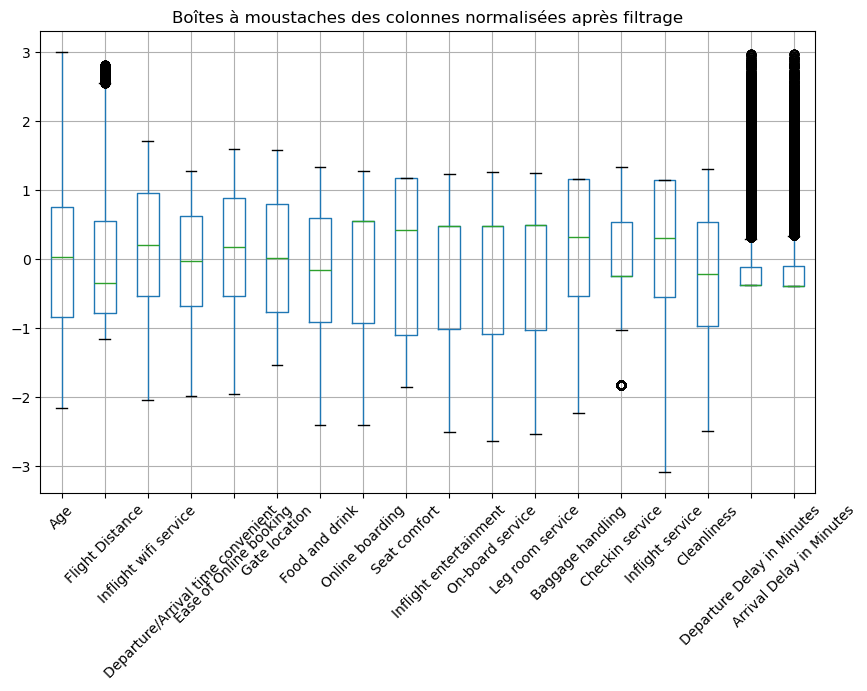

In [59]:
# Supprimer les lignes avec des valeurs supérieures à 5 dans les colonnes 'Departure Delay in Minutes' et 'Arrival Delay in Minutes'
test_enc_filtered = test_enc_scaled.loc[(test_enc_scaled['Departure Delay in Minutes'] <= 3) & (test_enc_scaled['Arrival Delay in Minutes'] <= 3) & (test_enc_scaled['Flight Distance'] <= 3)]

# Affichage des boîtes à moustaches après filtrage
plt.figure(figsize=(10, 6))
test_enc_filtered[columns_to_scale].boxplot()
plt.title('Boîtes à moustaches des colonnes normalisées après filtrage')
plt.xticks(rotation=45)
plt.show()

In [60]:
train_enc_filtered

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,-1.748219,1,2,-0.731999,0.204220,0.617410,0.173519,...,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624,0.273026,0.075623,neutral or dissatisfied
1,5047,1,1,-0.954439,0,0,-0.957550,0.204220,-0.692535,0.173519,...,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400,-0.359673,-0.236345,neutral or dissatisfied
2,110028,0,0,-0.888290,0,0,-0.048329,-0.548095,-0.692535,-0.539923,...,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624,-0.386036,-0.392329,satisfied
3,24026,0,0,-0.954439,0,0,-0.629749,-0.548095,1.272383,1.600402,...,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144,-0.096049,-0.158353,neutral or dissatisfied
4,119299,1,0,1.426902,0,0,-0.978601,0.204220,-0.037562,0.173519,...,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888,-0.386036,-0.392329,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,-0.359104,0,0,-0.665837,0.204220,-0.037562,0.173519,...,0.481157,-0.297744,-1.026556,0.311941,0.547933,1.153847,0.543368,-0.386036,-0.392329,neutral or dissatisfied
25972,71167,1,0,-1.086735,0,0,-0.545543,0.956536,0.617410,0.886960,...,0.481157,0.479240,1.252860,1.159342,1.337734,1.153847,0.543368,-0.386036,-0.392329,satisfied
25973,37675,0,0,-1.483625,1,1,-0.363098,-0.548095,1.272383,-1.253364,...,-1.017931,0.479240,-0.266751,0.311941,1.337734,0.303947,-0.979144,-0.386036,-0.392329,neutral or dissatisfied
25974,90086,1,0,-1.682070,0,0,-0.063365,0.204220,-0.037562,0.173519,...,0.481157,-0.297744,-1.026556,1.159342,0.547933,1.153847,0.543368,-0.386036,-0.392329,satisfied


In [61]:
test_enc_filtered

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,0.817898,0,1,-1.035195,1.705489,0.622058,0.172743,...,1.227409,1.259285,1.251091,1.162491,-1.035295,1.144456,1.299508,0.962074,0.779894,satisfied
1,90035,0,0,-0.239329,0,0,1.671574,-1.291472,-1.334964,0.172743,...,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,1.299508,-0.382547,-0.392913,satisfied
2,12360,1,1,-1.296556,0,1,-1.003150,-0.542232,-1.987305,-0.535209,...,-1.013710,0.479258,-1.781463,-0.537903,-1.035295,-1.396566,-0.974375,-0.382547,-0.392913,neutral or dissatisfied
3,77959,1,0,0.289285,0,0,2.186291,-2.040712,-1.987305,-1.951113,...,-1.760750,-1.860820,-1.781463,-2.238298,-0.247344,-2.243573,0.541547,-0.382547,-0.232985,satisfied
4,36875,0,0,0.619668,0,1,-0.011770,-0.542232,-0.030283,0.880696,...,-1.013710,-1.080794,-1.023325,-1.388101,0.540608,-1.396566,0.541547,-0.382547,0.140181,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,-0.371482,0,0,-0.668684,0.207008,-0.030283,0.172743,...,0.480370,-0.300768,-1.023325,0.312294,0.540608,1.144456,0.541547,-0.382547,-0.392913,neutral or dissatisfied
25972,71167,1,0,-1.098326,0,0,-0.548517,0.956248,0.622058,0.880696,...,0.480370,0.479258,1.251091,1.162491,1.328559,1.144456,0.541547,-0.382547,-0.392913,satisfied
25973,37675,0,0,-1.494786,1,1,-0.366263,-0.542232,1.274398,-1.243161,...,-1.013710,0.479258,-0.265186,0.312294,1.328559,0.297449,-0.974375,-0.382547,-0.392913,neutral or dissatisfied
25974,90086,1,0,-1.693016,0,0,-0.066846,0.207008,-0.030283,0.172743,...,0.480370,-0.300768,-1.023325,1.162491,0.540608,1.144456,0.541547,-0.382547,-0.392913,satisfied


In [62]:
XX = train_enc_filtered.drop(['id','satisfaction'],axis = 1)
yy = train_enc_filtered['satisfaction']

In [63]:
XXt = test_enc_filtered.drop(['id','satisfaction'],axis = 1)
yyt = test_enc_filtered['satisfaction']

## création du model et cross validation sur differentes k_values

In [65]:
# Définition des valeurs de k à tester
k_values = list(range(1, 31))

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Validation croisée pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, XX, yy, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Recherche du meilleur paramètre k
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Meilleur paramètre k trouvé par validation croisée :", best_k)

Meilleur paramètre k trouvé par validation croisée : 9


In [66]:
# Entraînement du modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(XX, yy)

# Évaluation sur l'ensemble de test
test_accuracy = best_knn.score(XXt, yyt)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.9449932822255591


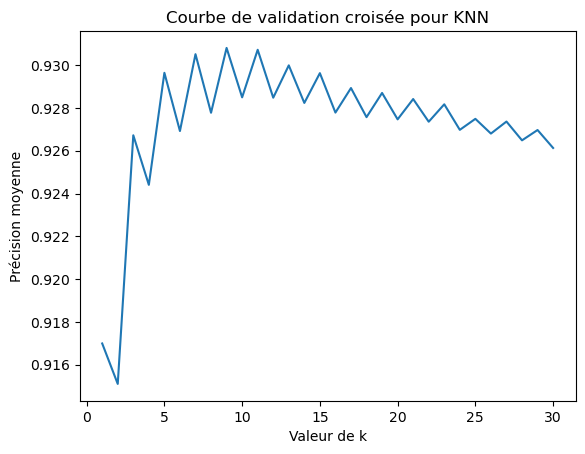

In [67]:
# Tracé de la courbe de validation croisée
plt.plot(k_values, cv_scores)
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.title('Courbe de validation croisée pour KNN')
plt.show()

## - grid search pour les autres hyperparametres

In [68]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'metric': ['euclidean', 'manhattan'],  # Métriques de distance à tester
    'weights': ['uniform', 'distance'],    # Poids des voisins à tester
    'algorithm': ['auto'],                  # Algorithme utilisé pour calculer les voisins
    'n_neighbors': [9],               # Nombre de voisins à tester
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur l'ensemble d'entraînement
grid_search.fit(XX, yy)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés par GridSearchCV :", grid_search.best_params_)

# Obtenir le meilleur modèle
best_knn_grid = grid_search.best_estimator_

# Évaluation sur l'ensemble de test avec le meilleur modèle
test_accuracy_grid = best_knn_grid.score(XXt, yyt)
print("Précision sur l'ensemble de test avec le meilleur modèle :", test_accuracy_grid)

Meilleurs paramètres trouvés par GridSearchCV : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Précision sur l'ensemble de test avec le meilleur modèle : 0.951078795542559


In [69]:
# Définir les hyperparamètres
hyperparameters = {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

# Créer un modèle KNN avec les hyperparamètres spécifiés
knn_model = KNeighborsClassifier(**hyperparameters)

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(XX, yy)

# Faire des prédictions sur l'ensemble de test
y_pred = knn_model.predict(XXt)

# Évaluer la précision du modèle
accuracy = knn_model.score(XXt, yyt)
print("Précision sur l'ensemble de test :", accuracy)

Précision sur l'ensemble de test : 0.951078795542559


In [71]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(yyt, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[13721   425]
 [  813 10347]]


In [73]:
yyt

0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25306, dtype: object

In [74]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur de labels
label_encoder = LabelEncoder()

# Encoder les étiquettes
yyt_encoded = label_encoder.fit_transform(yyt)

# Afficher les classes encodées
print("Classes encodées :", label_encoder.classes_)

Classes encodées : ['neutral or dissatisfied' 'satisfied']


In [75]:
yyt_encoded

array([1, 1, 0, ..., 0, 1, 0])

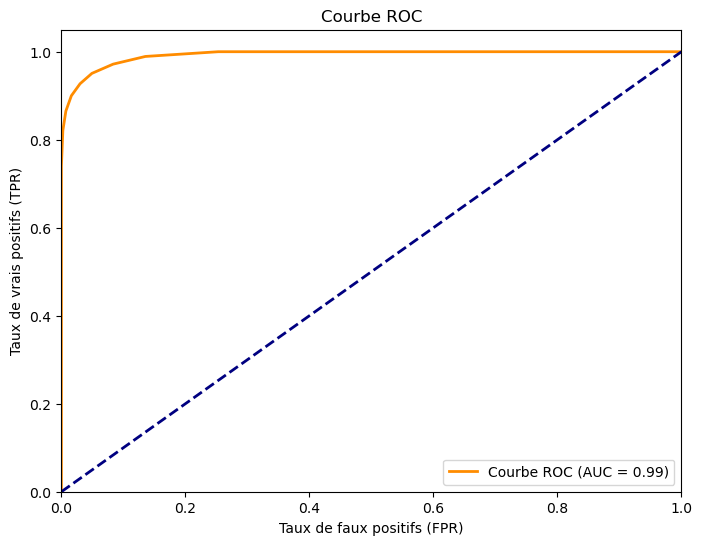

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les probabilités de prédiction pour chaque classe
probas_pred = knn_model.predict_proba(XXt)

# Calculer le taux de faux positifs, le taux de vrais positifs et le seuil
fpr, tpr, thresholds = roc_curve(yyt_encoded, probas_pred[:, 1])  # probabilité de la classe positive

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()